# THE SPARKS FOUNDATION

### GRIP : DATA SCIENCE & BUSINESS ANALYTICS INTERN - JUNE 2021

### Name : Pathi Samanvitha

### TASK-2 : Prediction Using Unsupervised ML

#### Unsupervised ML : 
It is a type of algorithm that trains machine using information that is not labeled and allowing the algorithm to act on that information without guidance.

#### Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### Importing required libraries

In [2]:
# Loading data
import pandas as pd
import numpy as np

# Datasets
from sklearn import datasets

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split


### Loading data

In [3]:
df_iris=pd.read_csv("C://Users//Samanvitha Pathi//Desktop//Iris.csv")

### Understanding data

In [4]:
# Structure of data
df_iris.shape

(150, 6)

In [5]:
#Column names
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Check first 5 rows
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Last 5 rows
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# Dropping ID as it's not required
df_iris=df_iris.drop("Id",axis=1)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# To see different species
df_iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Statistical details

In [11]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Missing values

In [12]:
df_iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values. So we can proceed with further steps

### Data Visualisation

### Pairplot 
- A pairplot plost a pairwise relationships in a dataset. <br>
- Used to check the binary relation among the differnt features in one graph. <br>
- The plots on the diagonal shows the distribution of the feature. <br>
- The rest of the plots shows the relationship between two features.<br>

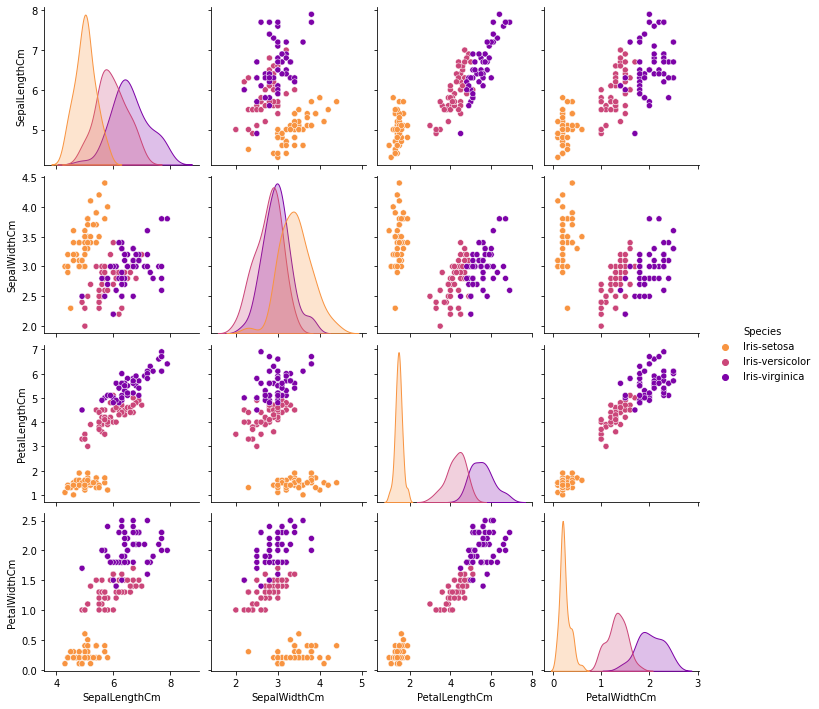

In [13]:
sns.pairplot(df_iris,hue='Species',diag_kind='kde',palette='plasma_r')

- Setosa is isolated from the other two species whereas Versicolor and Virginica mostly have similar dimension.s<br>
- High correlation between Petal length & Petal Width.<br>
- Setosa has low petal length & petal width.<br>
- Setosa has low sepal length & high sepal width.<br>
- Virginica has both high petal length and width.<br>
- Versicolor has average dimensions for all features.

### Correlation

<AxesSubplot:>

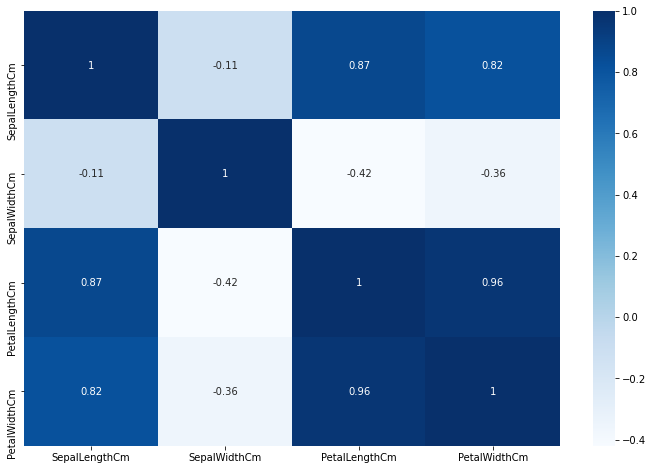

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df_iris.corr(),annot=True,cmap='Blues')

In [86]:
# Removing Species column to predict clusters
X=df_iris.iloc[:,0:4].values

### Finding optimum number of clusters for K-means algorithm using Elbow Method

### Elbow Method <br>
- The Elbow Method is used to determine the optimum number of clusters(k) in k-means clustering. <br>
- For each value of k, WCSS(Within-Cluster Sum of Squares) value is calculated. WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease.<br>
- The main idea is to minimize the distance between the data points and the centroid of the clusters.<br>
- The optimum number of clusters is where the elbow occurs

In [18]:
from sklearn.cluster import KMeans

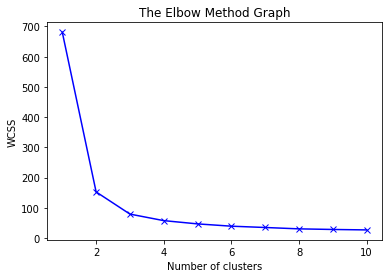

In [81]:
WCSS_values = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)
    kmeans.fit(X)
    WCSS_values.append(kmeans.inertia_)
    
plt.plot(range(1,11),WCSS_values,'bx-')
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

So, the optimum number of clusters = 3

### Applying kmeans classifier to the dataset

In [82]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_pred = kmeans.fit_predict(X)   # fitting model to dataset

### Visualising the clusters for Sepal length & Sepal width

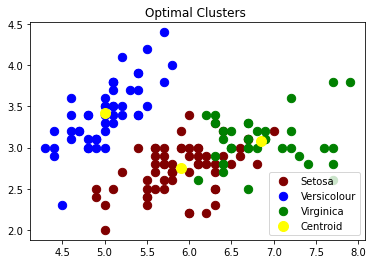

In [83]:
plt.scatter(X[y_pred == 0 ,0] , X[y_pred == 0 ,1] , s=70 , c = 'maroon' , label = 'Setosa')
plt.scatter(X[y_pred == 1 ,0] , X[y_pred == 1 ,1] , s=70 , c = 'blue' , label = 'Versicolour')
plt.scatter(X[y_pred == 2 ,0] , X[y_pred == 2 ,1] , s=70 , c = 'green' , label = 'Virginica')

# To plot centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=100 , c = 'yellow' , label = 'Centroid')
plt.title("Optimal Clusters ")
plt.legend()
plt.show()